In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

# Preprocess the data
X = X.astype('float32') / 255.0
y = y.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Multi-Layer Perceptron
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i+1])))

    def forward(self, x):
        activations = [x]
        for i in range(len(self.weights) - 1):
            z = np.dot(activations[i], self.weights[i]) + self.biases[i]
            a = relu(z)
            activations.append(a)

        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        output = softmax(z)
        activations.append(output)

        return activations

    def backward(self, activations, y):
      gradients = []
      deltas = [activations[-1] - np.eye(self.output_size)[y]]

      for i in range(len(self.weights) - 1, 0, -1):
          delta = np.dot(deltas[-1], self.weights[i].T) * (activations[i] > 0)
          deltas.append(delta)

      deltas = list(reversed(deltas))

      for i in range(len(self.weights)):
          gradients.append(np.dot(activations[i].T, deltas[i]))

      return gradients

    def update_weights(self, gradients, learning_rate):
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * gradients[i]
            self.biases[i] -= learning_rate * np.sum(gradients[i], axis=0, keepdims=True)

    def train(self, X, y, epochs, batch_size, learning_rate):
        for epoch in range(epochs):
            for i in range(0, len(X), batch_size):
                batch_X = X[i:i+batch_size]
                batch_y = y[i:i+batch_size]

                activations = self.forward(batch_X)
                gradients = self.backward(activations, batch_y)
                self.update_weights(gradients, learning_rate)

            if (epoch + 1) % 10 == 0:
                accuracy = self.evaluate(X, y)
                print(f"Epoch {epoch+1}: Accuracy = {accuracy:.4f}")

    def predict(self, X):
        activations = self.forward(X)
        return np.argmax(activations[-1], axis=1)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [4]:
# Create and train the MLP
input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10
epochs = 50
batch_size = 64
learning_rate = 0.1

In [5]:
mlp = MLP(input_size, hidden_sizes, output_size)
mlp.train(X_train, y_train, epochs, batch_size, learning_rate)

Epoch 10: Accuracy = 0.1019
Epoch 20: Accuracy = 0.1019
Epoch 30: Accuracy = 0.1019
Epoch 40: Accuracy = 0.1019
Epoch 50: Accuracy = 0.1019


In [6]:
# Evaluate the MLP on the test set
accuracy = mlp.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.1024


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocess the data
X_train = X_train.reshape((60000, 28 * 28)) / 255.0
X_test = X_test.reshape((10000, 28 * 28)) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

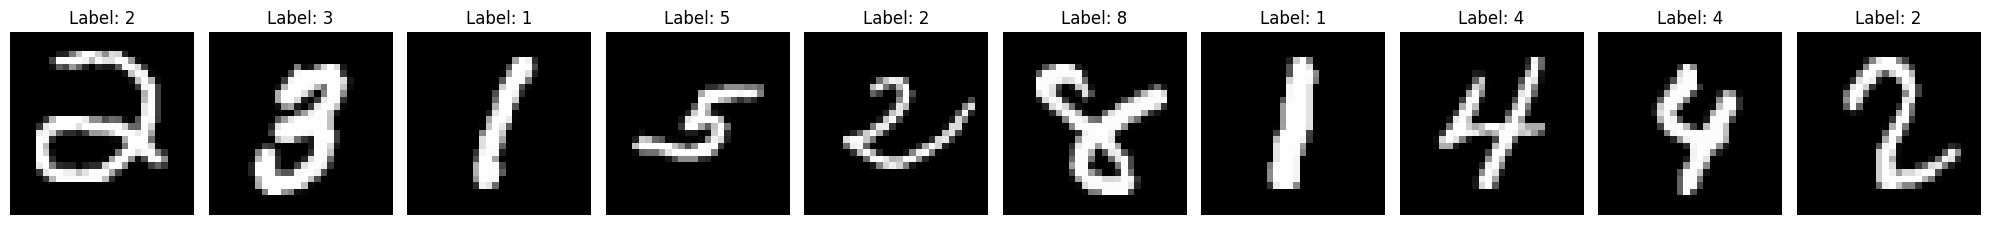

In [ ]:
# Visualize a subset of the dataset
num_samples = 10
indices = np.random.choice(len(X_train), num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
for i, index in enumerate(indices):
    image = X_train[index].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[index])}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()